# $\textbf{Import Library}$ 

In [3]:
import os
#os.environ['CRDS_PATH'] = '/fenrirdata1/kg_data/crds_cache/' #These pathways should be defined in your ~./bash profile. If not, you can set them within the notebook.
#os.environ['CRDS_SERVER_URL']= 'https://jwst-crds.stsci.edu'
#os.environ['CRDS_CONTEXT']='jwst_0756.pmap' #Occasionally, the JWST CRDS pmap will be updated. Updates may break existing code. Use this command to revert to an older working verison until the issue is fixed. 

import jwst
print(jwst.__version__) #Print what version of the pipeline you are using.

from jwst.pipeline.calwebb_detector1 import Detector1Pipeline #Stage 1
from jwst.pipeline.calwebb_image2 import Image2Pipeline #Stage 2
from jwst.pipeline.calwebb_tso3 import Tso3Pipeline #Stage 3
from jwst.associations.asn_from_list import asn_from_list #Association file imports
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase

#General
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
import asdf
import glob
import time
import yaml
from copy import deepcopy


from tshirt.pipeline import phot_pipeline #tshirt specific imports
from splintegrate import splintegrate

#modeling
import batman
from scipy.optimize import curve_fit

#Style Choice
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

1.3.1


## $\textbf{WLP8 50-60-90 Radii}$

#### $\textbf{External method: tshirt Old Method -  by eye / pipeline gives - fixed pixel for all integrations
}$

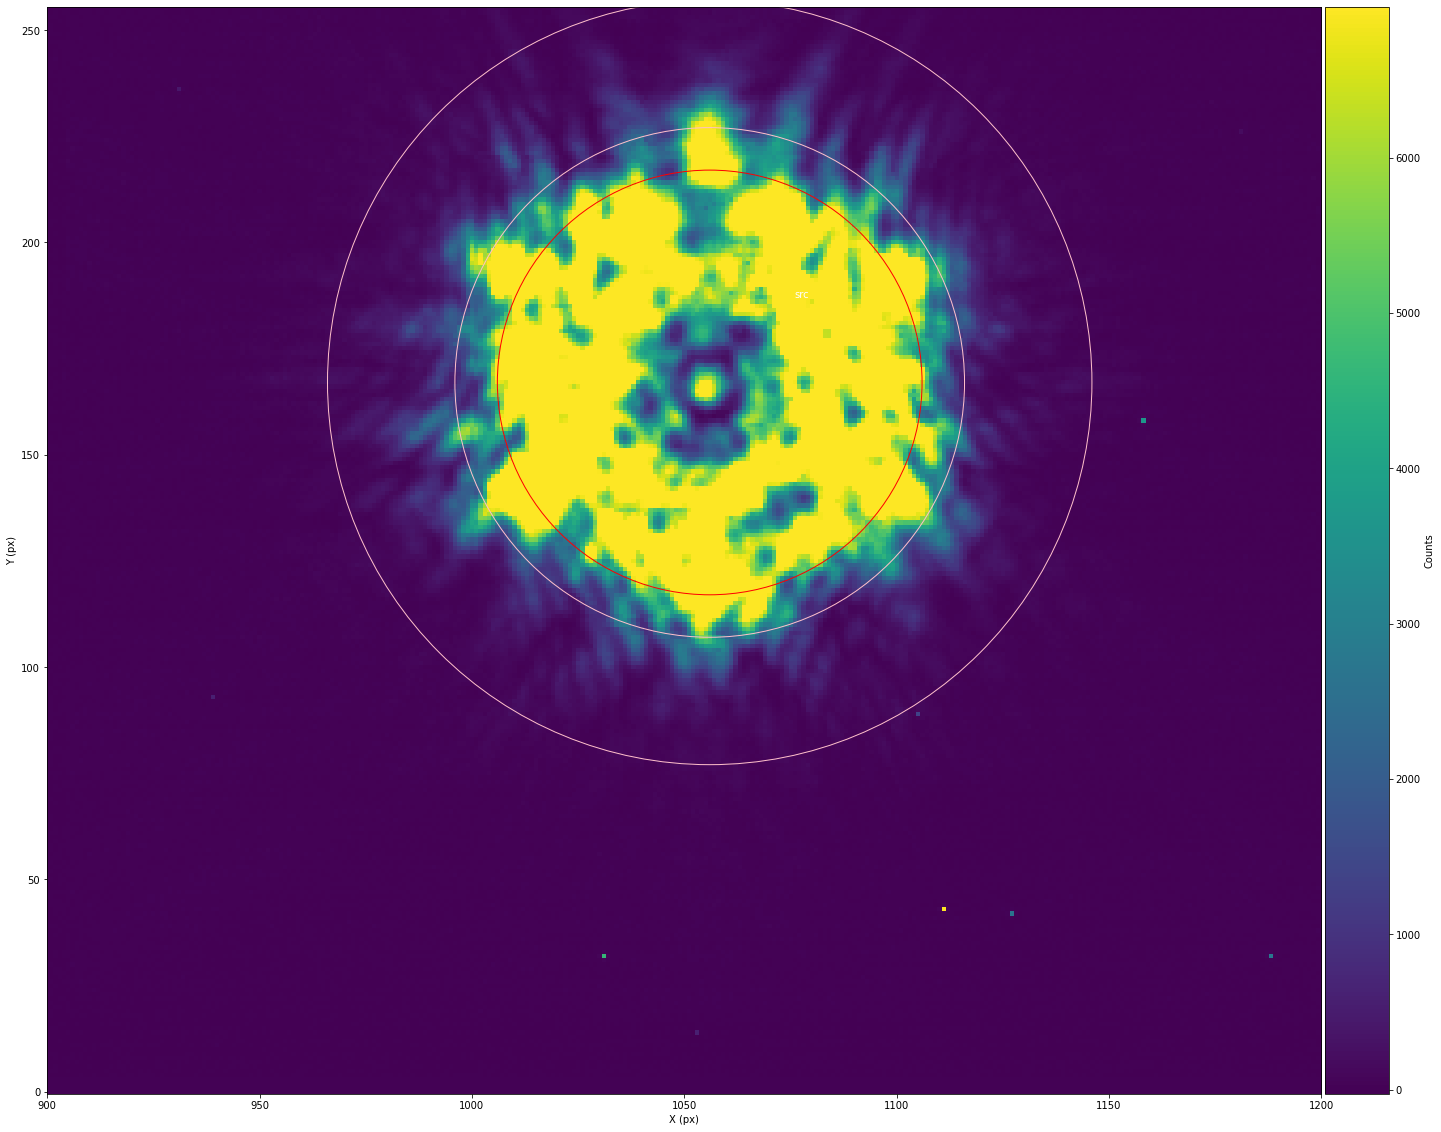

In [4]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' #Changing the outer radius
alteredParam['backEnd'] = 90 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 60 #Changing the inner radius

alteredParam['doCentering'] = False #old way/by eye
alteredParam['srcNameShort'] = 'WASP80b_phot2' #provide a new name for centroid realignment

#Assignimg a object new phot2
phot2 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object
#Assignimg a object phot
phot2.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [5]:
phot2.get_allimg_cen(recenter=True,useMultiprocessing=True) #recenter the centroids each time. 
phot2.do_phot(useMultiprocessing=True) #extract the photometric data

2021-11-23 12:59:57,376 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/io/fits/card.py:998: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

  0%|                                                  | 0/1227 [00:00<?, ?it/s]2021-11-23 12:59:57,667 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:57,686 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:57,687 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warn

2021-11-23 12:59:58,697 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:58,698 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:58,700 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:58,701 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:58,703 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 12:59:59,686 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  5%|██                                       | 61/1227 [00:02<00:39, 29.35it/s]2021-11-23 12:59:59,886 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  6%|██▎                                      | 69/1227 [00:02<00:31, 36.44it/s]2021-11-23 12:59:59,935 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 12:59:59,953 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

2021-11-23 13:00:00,903 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:00,912 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:00,918 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:00,929 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:00,930 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:01,895 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:01,905 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:01,924 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 11%|████▎                                   | 132/1227 [00:04<00:35, 30.48it/s]2021-11-23 13:00:02,099 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:03,065 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:03,076 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 14%|█████▌                                  | 169/1227 [00:05<00:30, 34.95it/s]2021-11-23 13:00:03,120 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:03,126 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:04,086 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:04,088 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:04,109 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:04,123 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:04,141 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:05,107 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 19%|███████▋                                | 234/1227 [00:07<00:32, 30.92it/s]2021-11-23 13:00:05,267 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:05,281 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:05,289 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:06,271 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:06,274 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:06,276 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:06,287 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:06,288 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:07,260 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 24%|█████████▊                              | 300/1227 [00:09<00:27, 33.77it/s]2021-11-23 13:00:07,307 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:07,341 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 25%|█████████▉                              | 304/1227 [00:09<00:31, 29.09it/s]2021-11-23 13:00:07,480 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

2021-11-23 13:00:08,428 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:08,487 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:08,495 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:08,501 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:08,509 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:09,461 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:09,473 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:09,476 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:09,493 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:09,526 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:10,458 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 33%|█████████████                           | 402/1227 [00:13<00:27, 29.68it/s]2021-11-23 13:00:10,629 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:10,643 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:10,670 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 36%|██████████████▏                         | 436/1227 [00:14<00:25, 30.57it/s]2021-11-23 13:00:11,658 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:11,678 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:11,687 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:11,712 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:12,667 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:12,670 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:12,672 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 38%|███████████████▎                        | 471/1227 [00:15<00:23, 32.36it/s]2021-11-23 13:00:12,798 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:13,780 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 41%|████████████████▍                       | 505/1227 [00:16<00:22, 32.30it/s]2021-11-23 13:00:13,853 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:13,873 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:13,875 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:14,841 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:14,867 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:14,874 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:14,889 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:14,901 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:15,840 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 47%|██████████████████▌                     | 571/1227 [00:18<00:20, 32.67it/s]2021-11-23 13:00:15,945 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:15,982 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 47%|██████████████████▋                     | 575/1227 [00:18<00:20, 31.10it/s]2021-11-23 13:00:16,052 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

 49%|███████████████████▋                    | 605/1227 [00:19<00:19, 32.17it/s]2021-11-23 13:00:16,957 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:17,008 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:17,010 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:17,017 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 52%|████████████████████▊                   | 640/1227 [00:20<00:17, 33.72it/s]2021-11-23 13:00:18,009 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:18,013 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:18,023 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:18,068 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:19,034 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:19,087 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:19,114 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 55%|██████████████████████                  | 675/1227 [00:21<00:18, 30.40it/s]2021-11-23 13:00:19,201 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:20,150 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 58%|███████████████████████▏                | 710/1227 [00:22<00:15, 34.06it/s]2021-11-23 13:00:20,187 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:20,191 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:20,200 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:21,155 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:21,203 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:21,231 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:21,291 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:21,297 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:00:22,249 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 63%|█████████████████████████▏              | 774/1227 [00:24<00:15, 29.33it/s]2021-11-23 13:00:22,356 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:22,379 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:22,384 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:23,340 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:23,344 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:23,344 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 66%|██████████████████████████▍             | 810/1227 [00:25<00:12, 34.08it/s]2021-11-23 13:00:23,420 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:24,375 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:24,432 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:24,453 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 69%|███████████████████████████▌            | 844/1227 [00:26<00:12, 30.51it/s]2021-11-23 13:00:24,539 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 71%|████████████████████████████▌           | 876/1227 [00:27<00:11, 29.90it/s]2021-11-23 13:00:25,485 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:25,511 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:25,548 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:25,581 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:26,519 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:26,534 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:26,555 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:26,561 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 74%|█████████████████████████████▋          | 912/1227 [00:29<00:09, 33.51i

 77%|██████████████████████████████▋         | 943/1227 [00:29<00:08, 33.87it/s]2021-11-23 13:00:27,534 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:27,580 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:27,602 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:27,682 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:28,617 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 80%|███████████████████████████████▊        | 977/1227 [00:31<00:07, 31.49it/s]2021-11-23 13:00:28,654 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:28,666 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:28,695 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:29,635 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:29,635 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:29,687 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 82%|████████████████████████████████▏      | 1012/1227 [00:32<00:06, 32.69it/s]2021-11-23 13:00:29,713 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 85%|█████████████████████████████████      | 1042/1227 [00:33<00:05, 32.71it/s]2021-11-23 13:00:30,655 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:30,662 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:30,718 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:30,765 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:31,709 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 88%|██████████████████████████████████▏    | 1075/1227 [00:34<00:05, 27.64it/s]2021-11-23 13:00:31,813 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:31,817 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:31,822 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:32,786 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 90%|███████████████████████████████████▎   | 1110/1227 [00:35<00:03, 33.98it/s]2021-11-23 13:00:32,802 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:32,819 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:32,867 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:33,833 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 93%|████████████████████████████████████▎  | 1143/1227 [00:36<00:02, 33.24it/s]2021-11-23 13:00:33,855 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:33,914 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 93%|████████████████████████████████████▍  | 1147/1227 [00:36<00:02, 33.85it/s]2021-11-23 13:00:33,993 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

 96%|█████████████████████████████████████▍ | 1178/1227 [00:37<00:01, 34.60it/s]2021-11-23 13:00:34,931 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:34,934 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:34,938 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:34,944 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:00:35,901 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:35,912 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 99%|██████████████████████████████████████▍| 1211/1227 [00:38<00:00, 34.25it/s]2021-11-23 13:00:35,988 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:00:36,000 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

Tshirt Calculated Net Aperture Sum MAD (ppm): 308.9053908767747
Tshirt Calculated Net Aperture Sum std (ppm): 424.9946220647034
Median Relative Errors Net Aperture Sum (ppm): 137.44965965494532


<ErrorbarContainer object of 3 artists>

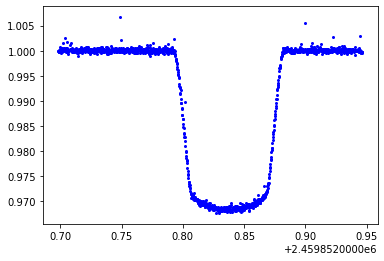

In [7]:
#Tshirt: net aperture
Flux2, Flux_error2 = phot2.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt2 = Flux2['Flux 0']/Flux2['Flux 0'][0] #normalized net aperture sum
std_tshirt2 = np.std(normalized_flux_tshirt2[0:20]) #calculated standard deviation
relative_error_tshirt2 = (Flux_error2['Error 0']/Flux2['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt2[0:300] - np.median(normalized_flux_tshirt2[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt2*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt2)*10**6))

plt.errorbar(Flux2['Time (JD)'],normalized_flux_tshirt2,yerr=relative_error_tshirt2,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')

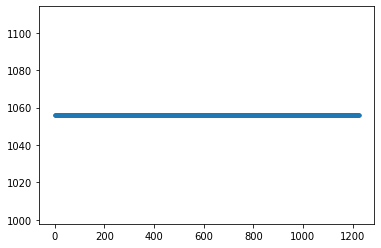

In [9]:
plt.plot(phot2.cenArr[:,0,0],'.') #Check that the centroid is a straight line - fix position

#### $\textbf{External method: tshirt New Method -  doCentering: True
}$

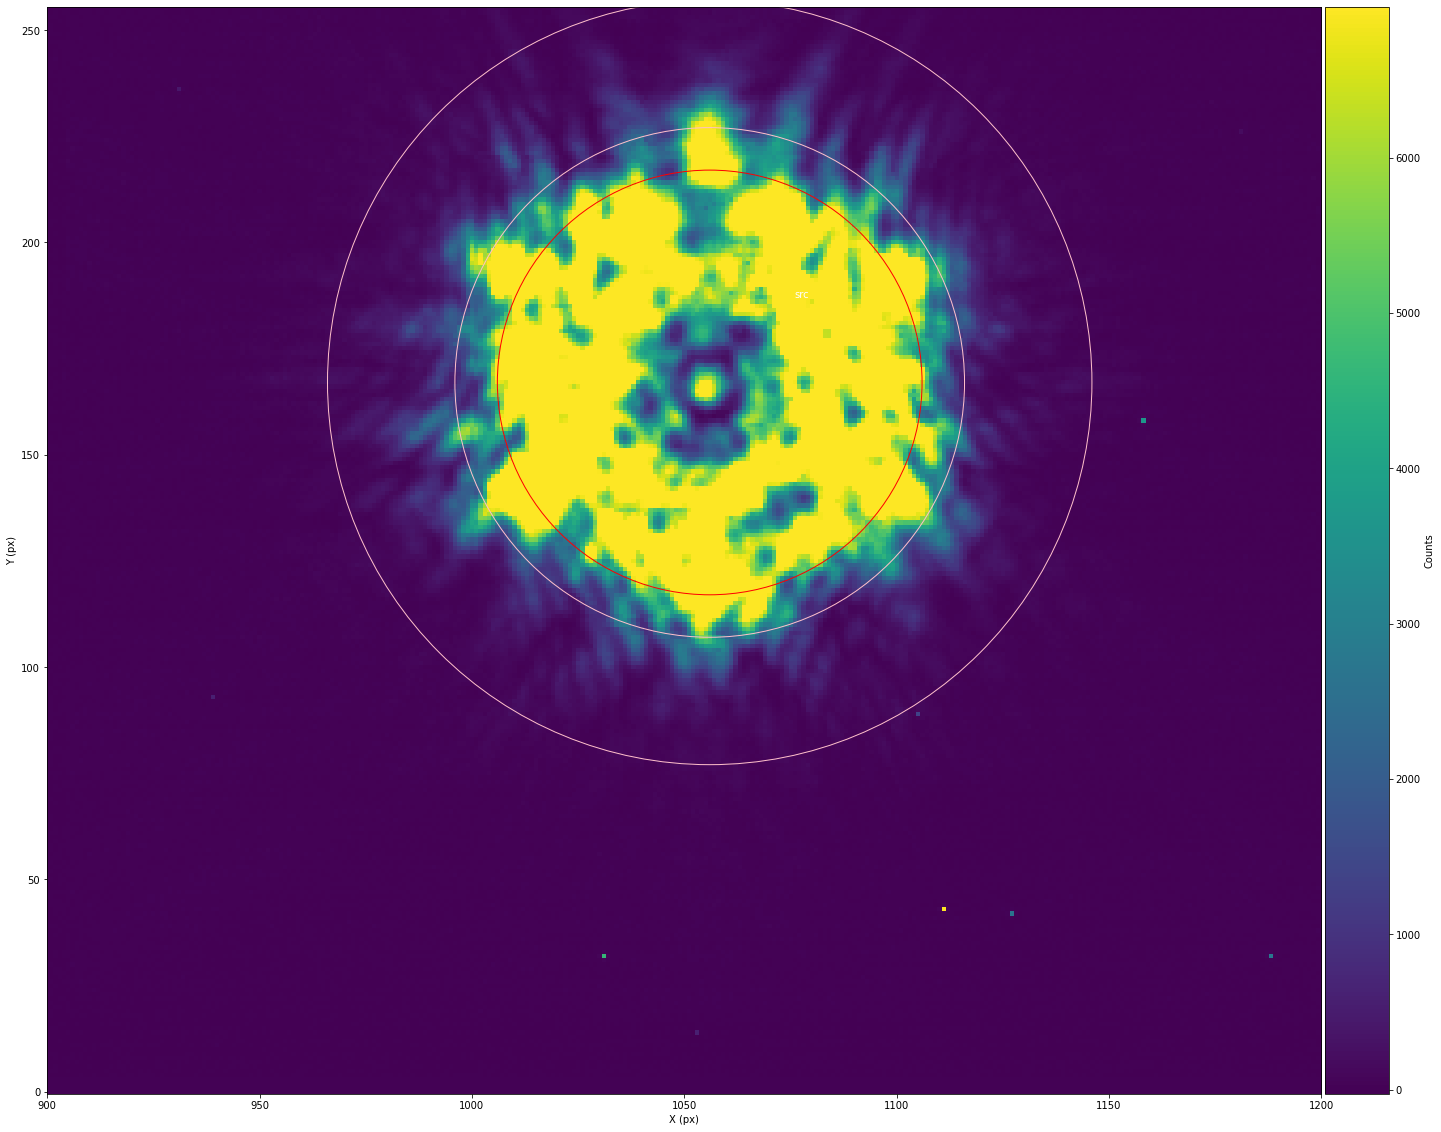

In [14]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' #Changing the outer radius
alteredParam['backEnd'] = 90 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 60 #Changing the inner radius

alteredParam['doCentering'] = True #new way
alteredParam['srcNameShort'] = 'WASP80b_phot3' #provide a new name for centroid realignment


#Assignimg a object new phot2
phot3 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object
#Assignimg a object phot
phot3.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [15]:
phot3.get_allimg_cen(recenter=True,useMultiprocessing=True) #recenter the centroids each time. 
phot3.do_phot(useMultiprocessing=True) #extract the photometric data

 10%|███▊                                    | 117/1227 [00:04<00:36, 30.73it/s]2021-11-23 13:08:21,463 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

 10%|███▉                                    | 121/1227 [00:04<00:35, 31.15it/s]2021-11-23 13:08:21,583 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

2021-11-23 13:08:21,637 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "



 30%|████████████▏                           | 372/1227 [00:12<00:31, 27.07it/s]2021-11-23 13:08:30,122 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

 31%|████████████▎                           | 379/1227 [00:12<00:28, 29.40it/s]2021-11-23 13:08:30,323 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

 34%|█████████████▋                          | 418/1227 [00:14<00:22, 35.39it/s]2021-11-23 13:08:31,351 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message

 68%|███████████████████████████             | 831/1227 [00:27<00:14, 28.12it/s]2021-11-23 13:08:44,772 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

 68%|███████████████████████████▎            | 838/1227 [00:27<00:11, 34.65it/s]2021-11-23 13:08:44,919 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "

2021-11-23 13:08:44,967 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/modeling/fitting.py:1166: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
  warnings.warn("The fit may be unsuccessful; check "



2021-11-23 13:08:57,962 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:57,963 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:57,969 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:57,979 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:58,276 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:08:59,241 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:59,244 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:59,255 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:59,265 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:08:59,274 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:09:00,239 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:00,244 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:00,269 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:00,276 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:00,304 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:09:01,250 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:01,445 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:01,450 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  9%|███▌                                    | 111/1227 [00:03<00:39, 28.27it/s]2021-11-23 13:09:01,482 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:02,451 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:02,455 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:02,463 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:02,464 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 12%|████▋                                   | 144/1227 [00:04<00:36, 29.67i

2021-11-23 13:09:03,448 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:03,457 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 15%|█████▊                                  | 178/1227 [00:05<00:30, 34.94it/s]2021-11-23 13:09:03,513 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:03,671 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:04,647 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:04,668 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:04,691 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:04,714 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:04,721 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:09:05,673 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:05,685 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:05,696 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 20%|████████                                | 247/1227 [00:08<00:29, 33.75it/s]2021-11-23 13:09:05,705 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:06,678 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:06,815 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 23%|█████████▏                              | 281/1227 [00:09<00:29, 31.57it/s]2021-11-23 13:09:06,874 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:06,894 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:07,848 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:07,882 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 26%|██████████▎                             | 315/1227 [00:10<00:28, 32.37it/s]2021-11-23 13:09:07,906 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:07,914 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:08,880 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:08,890 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:08,943 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 29%|███████████▍                            | 350/1227 [00:11<00:26, 33.25it/s]2021-11-23 13:09:09,052 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 31%|████████████▍                           | 381/1227 [00:12<00:29, 28.92it/s]2021-11-23 13:09:10,027 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:10,041 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:10,052 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:10,105 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 34%|█████████████▍                          | 414/1227 [00:13<00:24, 33.19it/s]2021-11-23 13:09:11,055 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:11,081 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:11,090 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:11,107 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 36%|██████████████▌                         | 447/1227 [00:14<00:23, 33.00it/s]2021-11-23 13:09:12,083 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:12,133 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:12,223 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 37%|██████████████▋                         | 451/1227 [00:14<00:26, 29.30it/s]2021-11-23 13:09:12,251 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

2021-11-23 13:09:13,200 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:13,206 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 39%|███████████████▋                        | 482/1227 [00:15<00:25, 29.13it/s]2021-11-23 13:09:13,222 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:13,228 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:14,204 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:14,248 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 42%|████████████████▊                       | 517/1227 [00:16<00:20, 34.49it/s]2021-11-23 13:09:14,288 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:14,317 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:15,278 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:15,405 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:15,408 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 45%|█████████████████▉                      | 551/1227 [00:17<00:23, 28.49it/s]2021-11-23 13:09:15,444 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:16,399 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:16,415 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:16,436 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:16,456 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 48%|███████████████████▏                    | 587/1227 [00:18<00:18, 34.58i

2021-11-23 13:09:17,405 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:17,426 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:17,520 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 51%|████████████████████▏                   | 620/1227 [00:19<00:18, 32.34it/s]2021-11-23 13:09:17,553 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:18,490 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 53%|█████████████████████▏                  | 650/1227 [00:20<00:18, 31.82it/s]2021-11-23 13:09:18,600 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:18,626 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:18,627 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:19,591 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 56%|██████████████████████▎                 | 684/1227 [00:22<00:17, 31.04it/s]2021-11-23 13:09:19,603 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:19,607 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:19,621 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:20,723 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:20,727 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 59%|███████████████████████▍                | 720/1227 [00:23<00:16, 31.19it/s]2021-11-23 13:09:20,743 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:20,801 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:21,750 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:21,758 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 61%|████████████████████████▌               | 754/1227 [00:24<00:14, 32.97it/s]2021-11-23 13:09:21,802 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:21,804 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:22,764 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:22,823 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 64%|█████████████████████████▋              | 789/1227 [00:25<00:12, 33.79it/s]2021-11-23 13:09:22,891 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:22,944 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:23,928 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:23,958 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 67%|██████████████████████████▊             | 823/1227 [00:26<00:13, 29.76it/s]2021-11-23 13:09:23,976 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:23,985 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:25,002 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:25,012 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:25,019 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 70%|███████████████████████████▉            | 857/1227 [00:27<00:11, 31.40it/s]2021-11-23 13:09:25,062 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 72%|████████████████████████████▉           | 887/1227 [00:28<00:10, 31.88it/s]2021-11-23 13:09:26,021 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:26,053 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:26,120 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:26,135 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 75%|██████████████████████████████          | 921/1227 [00:29<00:09, 31.82it/s]2021-11-23 13:09:27,129 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:27,141 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:27,151 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:27,241 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:28,203 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 78%|███████████████████████████████▏        | 956/1227 [00:30<00:08, 31.05it/s]2021-11-23 13:09:28,218 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:28,229 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:28,245 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:29,300 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 81%|████████████████████████████████▎       | 991/1227 [00:31<00:07, 31.79it/s]2021-11-23 13:09:29,332 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:29,345 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:29,351 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:30,353 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 84%|████████████████████████████████▌      | 1025/1227 [00:32<00:06, 33.57it/s]2021-11-23 13:09:30,431 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:30,451 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:30,459 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:31,450 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:31,473 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:31,478 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 86%|█████████████████████████████████▋     | 1059/1227 [00:33<00:05, 29.71it/s]2021-11-23 13:09:31,515 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:32,470 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:32,482 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:32,509 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:32,597 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 89%|██████████████████████████████████▊    | 1095/1227 [00:35<00:04, 32.04i

2021-11-23 13:09:33,566 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 92%|███████████████████████████████████▊   | 1125/1227 [00:36<00:03, 31.63it/s]2021-11-23 13:09:33,667 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:33,674 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:33,700 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 94%|████████████████████████████████████▊  | 1159/1227 [00:37<00:02, 31.38it/s]2021-11-23 13:09:34,665 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:34,671 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:34,682 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:34,683 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:09:35,648 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:35,754 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 97%|█████████████████████████████████████▉ | 1195/1227 [00:38<00:00, 32.69it/s]2021-11-23 13:09:35,817 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:09:35,876 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

100%|███████████████████████████████████████| 1227/1227 [00:39<00:00, 31.26it/s]


Tshirt Calculated Net Aperture Sum MAD (ppm): 360.1235714034567
Tshirt Calculated Net Aperture Sum std (ppm): 475.4653960470073
Median Relative Errors Net Aperture Sum (ppm): 137.4568821205212


<ErrorbarContainer object of 3 artists>

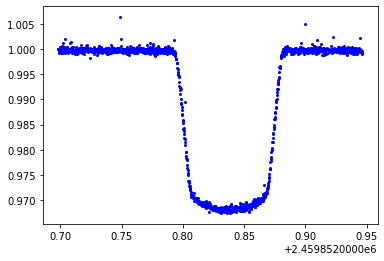

In [16]:
#Tshirt: net aperture
Flux3, Flux_error3 = phot3.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt3 = Flux3['Flux 0']/Flux3['Flux 0'][0] #normalized net aperture sum
std_tshirt3 = np.std(normalized_flux_tshirt3[0:20]) #calculated standard deviation
relative_error_tshirt3 = (Flux_error3['Error 0']/Flux3['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt3[0:300] - np.median(normalized_flux_tshirt3[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt3*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt3)*10**6))

plt.errorbar(Flux3['Time (JD)'],normalized_flux_tshirt3,yerr=relative_error_tshirt3,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')
#plt.plot(phot3.cenArr[:,0,0],'.')

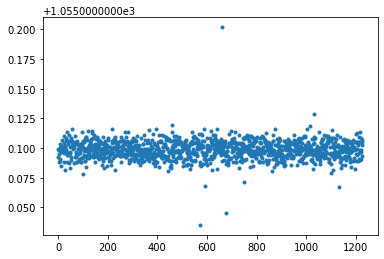

In [17]:
plt.plot(phot3.cenArr[:,0,0],'.') #Should see variation - not fixed

#### $\textbf{External method: tshirt Alternative Method -  doCentering: False, use median centroid
}$

In [18]:
print(np.median(phot3.cenArr[:,0,0]),np.median(phot3.cenArr[:,0,1]))

1055.0986619018936 165.91533516305765


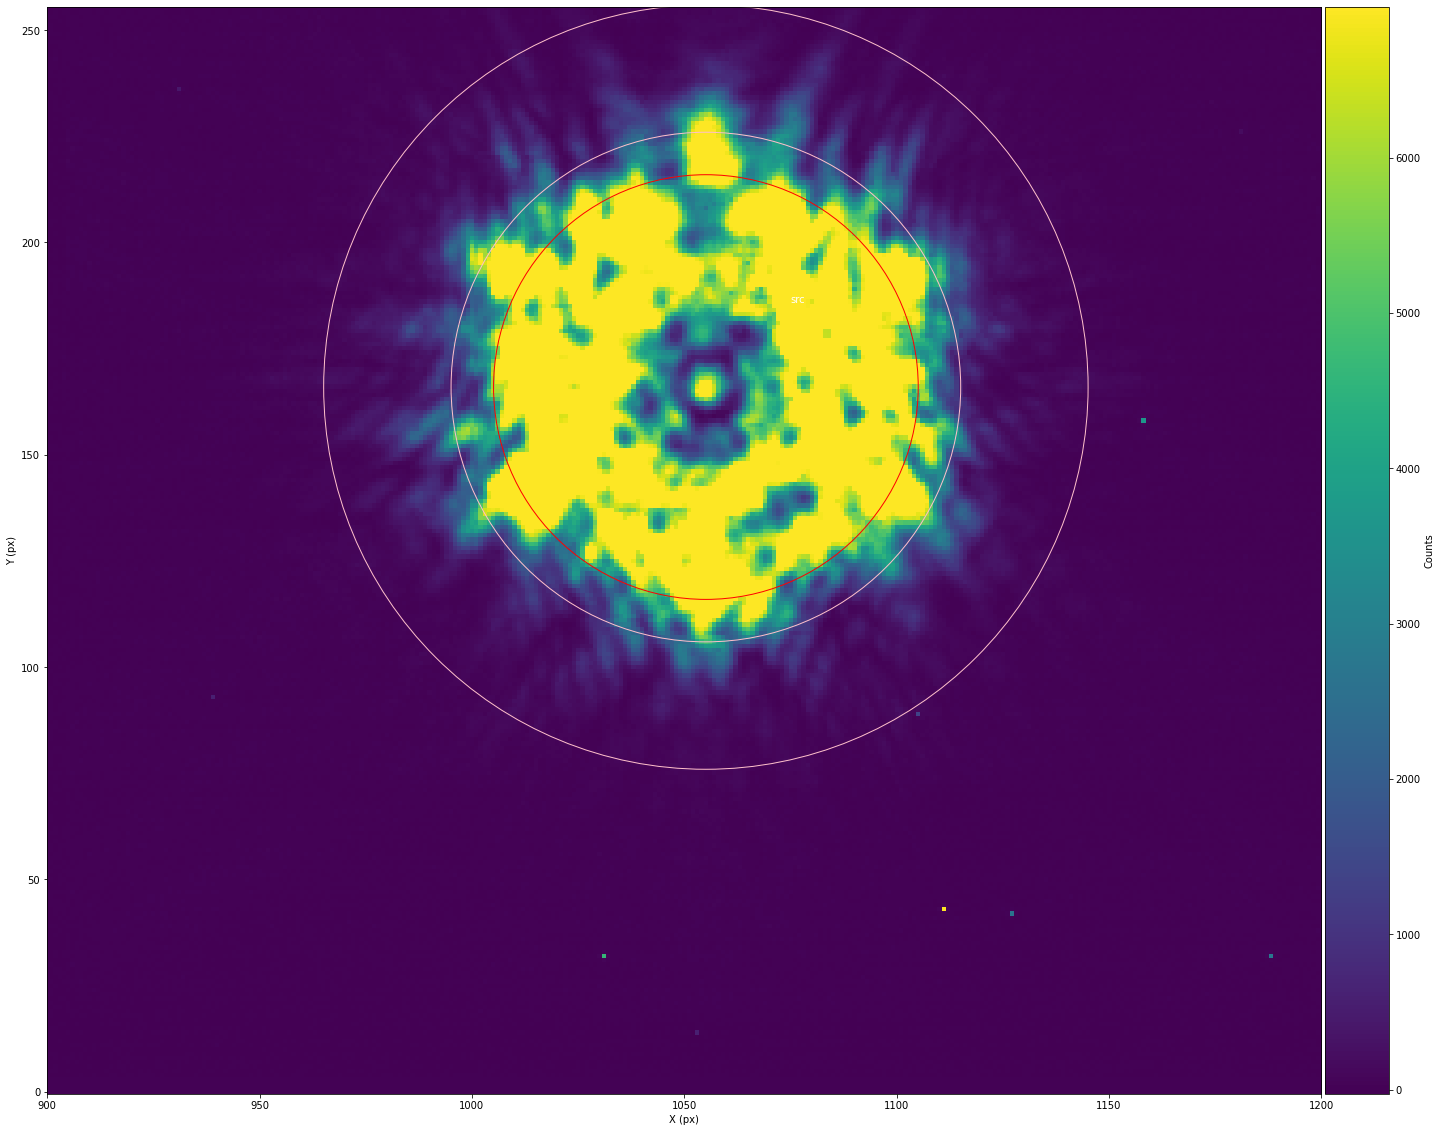

In [23]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' #Changing the outer radius
alteredParam['backEnd'] = 90 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 60 #Changing the inner radius

alteredParam['doCentering'] = False #new way
alteredParam['srcNameShort'] = 'WASP80b_phot4' #provide a new name for centroid realignment
alteredParam['refStarPos'] = [[1055.0986619018936,165.91533516305765]]

#Assignimg a object new phot2
phot4 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object
#Assignimg a object phot
phot4.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [24]:
phot4.get_allimg_cen(recenter=True,useMultiprocessing=True) #recenter the centroids each time. 
phot4.do_phot(useMultiprocessing=True) #extract the photometric data

2021-11-23 13:19:59,757 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/io/fits/card.py:998: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

  0%|                                                  | 0/1227 [00:00<?, ?it/s]2021-11-23 13:20:00,305 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  0%|                                          | 1/1227 [00:00<07:49,  2.61it/s]2021-11-23 13:20:00,330 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:00,355 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/

2021-11-23 13:20:01,349 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:01,357 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:01,362 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:01,365 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:01,370 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:20:02,332 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:02,343 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:02,345 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:02,562 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  6%|██▎                                      | 71/1227 [00:02<00:40, 28.40i

2021-11-23 13:20:03,562 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:03,569 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

  8%|███▍                                    | 104/1227 [00:03<00:36, 30.38it/s]2021-11-23 13:20:03,615 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:03,623 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:04,573 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 11%|████▍                                   | 135/1227 [00:04<00:34, 31.53it/s]2021-11-23 13:20:04,586 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:04,602 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:04,608 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:05,679 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 14%|█████▌                                  | 171/1227 [00:05<00:32, 32.02it/s]2021-11-23 13:20:05,722 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:05,762 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:05,796 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:06,774 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:06,779 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 17%|██████▋                                 | 205/1227 [00:06<00:33, 30.10it/s]2021-11-23 13:20:06,797 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:06,801 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:07,783 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:07,805 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:07,926 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 20%|███████▊                                | 241/1227 [00:07<00:31, 31.41it/s]2021-11-23 13:20:07,959 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:08,911 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:08,952 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:09,010 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:09,014 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:09,028 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:20:09,986 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:09,987 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 25%|█████████▉                              | 305/1227 [00:10<00:30, 29.77it/s]2021-11-23 13:20:10,040 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:10,059 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 28%|███████████                             | 339/1227 [00:11<00:27, 32.42it/s]2021-11-23 13:20:11,068 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:11,129 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:11,135 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 28%|███████████▏                            | 343/1227 [00:11<00:27, 32.62it/s]2021-11-23 13:20:11,153 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: User

2021-11-23 13:20:12,089 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:12,201 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:12,213 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:12,218 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:12,223 - stpipe - WARNING - /home/kglidic/miniconda3/envs/J

2021-11-23 13:20:13,186 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 33%|█████████████▎                          | 407/1227 [00:13<00:26, 30.93it/s]2021-11-23 13:20:13,238 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:13,266 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:13,277 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:14,236 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:14,256 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:14,283 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 36%|██████████████▍                         | 443/1227 [00:14<00:23, 33.57it/s]2021-11-23 13:20:14,304 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 39%|███████████████▍                        | 473/1227 [00:15<00:22, 33.24it/s]2021-11-23 13:20:15,271 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:15,322 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:15,404 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:15,424 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:16,396 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 41%|████████████████▌                       | 507/1227 [00:16<00:24, 29.07it/s]2021-11-23 13:20:16,441 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:16,455 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:16,458 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:17,423 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:17,441 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:17,488 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:17,504 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 44%|█████████████████▋                      | 544/1227 [00:17<00:20, 34.02i

2021-11-23 13:20:18,577 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:18,632 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:18,632 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 47%|██████████████████▊                     | 578/1227 [00:18<00:22, 29.14it/s]2021-11-23 13:20:18,677 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:19,607 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 50%|███████████████████▉                    | 610/1227 [00:19<00:18, 32.65it/s]2021-11-23 13:20:19,652 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:19,671 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:19,687 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 52%|████████████████████▉                   | 642/1227 [00:20<00:18, 31.80it/s]2021-11-23 13:20:20,678 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:20,689 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:20,723 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:20,854 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 55%|██████████████████████                  | 677/1227 [00:21<00:17, 30.80it/s]2021-11-23 13:20:21,842 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:21,842 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:21,848 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:21,848 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:22,883 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:22,889 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 58%|███████████████████████▏                | 712/1227 [00:22<00:15, 32.30it/s]2021-11-23 13:20:22,915 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:22,925 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:23,886 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:23,984 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 61%|████████████████████████▎               | 747/1227 [00:24<00:14, 32.04it/s]2021-11-23 13:20:24,057 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:24,085 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:25,059 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:25,083 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:25,092 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 64%|█████████████████████████▍              | 781/1227 [00:25<00:14, 30.34it/s]2021-11-23 13:20:25,111 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 66%|██████████████████████████▍             | 811/1227 [00:26<00:13, 30.30it/s]2021-11-23 13:20:26,058 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:26,081 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:26,092 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:26,173 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 69%|███████████████████████████▌            | 846/1227 [00:27<00:10, 34.90it/s]2021-11-23 13:20:27,112 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:27,198 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:27,222 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:27,238 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:28,198 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 72%|████████████████████████████▋           | 881/1227 [00:28<00:11, 30.82it/s]2021-11-23 13:20:28,223 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:28,281 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:28,287 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 74%|█████████████████████████████▊          | 913/1227 [00:29<00:10, 30.98it/s]2021-11-23 13:20:29,262 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:29,274 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:29,325 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:29,404 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 77%|██████████████████████████████▊         | 947/1227 [00:30<00:08, 32.47it/s]2021-11-23 13:20:30,359 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:30,366 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:30,383 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:30,411 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:31,352 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 80%|███████████████████████████████▉        | 980/1227 [00:31<00:07, 32.87it/s]2021-11-23 13:20:31,425 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:31,459 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:31,482 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:32,440 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:32,450 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:32,489 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:32,490 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 83%|████████████████████████████████▎      | 1016/1227 [00:32<00:06, 32.53i

2021-11-23 13:20:33,465 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 85%|█████████████████████████████████▎     | 1047/1227 [00:33<00:05, 33.34it/s]2021-11-23 13:20:33,530 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:33,543 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:33,548 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 88%|██████████████████████████████████▎    | 1080/1227 [00:34<00:04, 33.36it/s]2021-11-23 13:20:34,510 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:34,605 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:34,660 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:34,670 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:35,617 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:35,658 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:35,662 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:35,673 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 91%|███████████████████████████████████▍   | 1116/1227 [00:35<00:03, 31.77i

 93%|████████████████████████████████████▍  | 1145/1227 [00:36<00:02, 29.72it/s]2021-11-23 13:20:36,663 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:36,670 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:36,691 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:36,749 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

 96%|█████████████████████████████████████▌ | 1181/1227 [00:37<00:01, 33.89it/s]2021-11-23 13:20:37,718 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:37,776 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:37,817 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:37,885 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntex

2021-11-23 13:20:38,845 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:38,854 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:38,855 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

2021-11-23 13:20:38,858 - stpipe - WARNING - /home/kglidic/miniconda3/envs/JWST-1.3.1/lib/python3.9/site-packages/tshirt/pipeline/utils.py:94: UserWarning: Less than 0points accepted, returning flat line
  warnings.warn(warntext)

 99%|██████████████████████████████████████▋| 1216/1227 [00:38<00:00, 30.28i

Tshirt Calculated Net Aperture Sum MAD (ppm): 353.0719401310889
Tshirt Calculated Net Aperture Sum std (ppm): 474.27564453726194
Median Relative Errors Net Aperture Sum (ppm): 137.45644422312398


<ErrorbarContainer object of 3 artists>

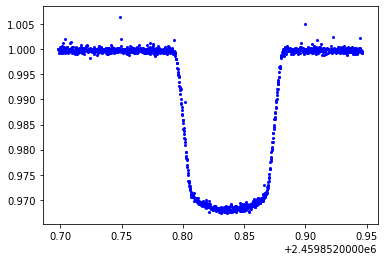

In [26]:
#Tshirt: net aperture
Flux4, Flux_error4 = phot4.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt4 = Flux4['Flux 0']/Flux4['Flux 0'][0] #normalized net aperture sum
std_tshirt4 = np.std(normalized_flux_tshirt4[0:20]) #calculated standard deviation
relative_error_tshirt4 = (Flux_error4['Error 0']/Flux4['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt4[0:300] - np.median(normalized_flux_tshirt4[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt4*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt4)*10**6))

plt.errorbar(Flux4['Time (JD)'],normalized_flux_tshirt4,yerr=relative_error_tshirt4,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')

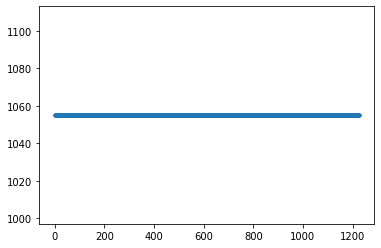

In [27]:
plt.plot(phot4.cenArr[:,0,0],'.') #Should be fixed

## $\textbf{WLP8 50-5-20 Radii}$

#### $\textbf{External method: tshirt Old Method -  by eye / pipeline gives - fixed pixel for all integrations
}$

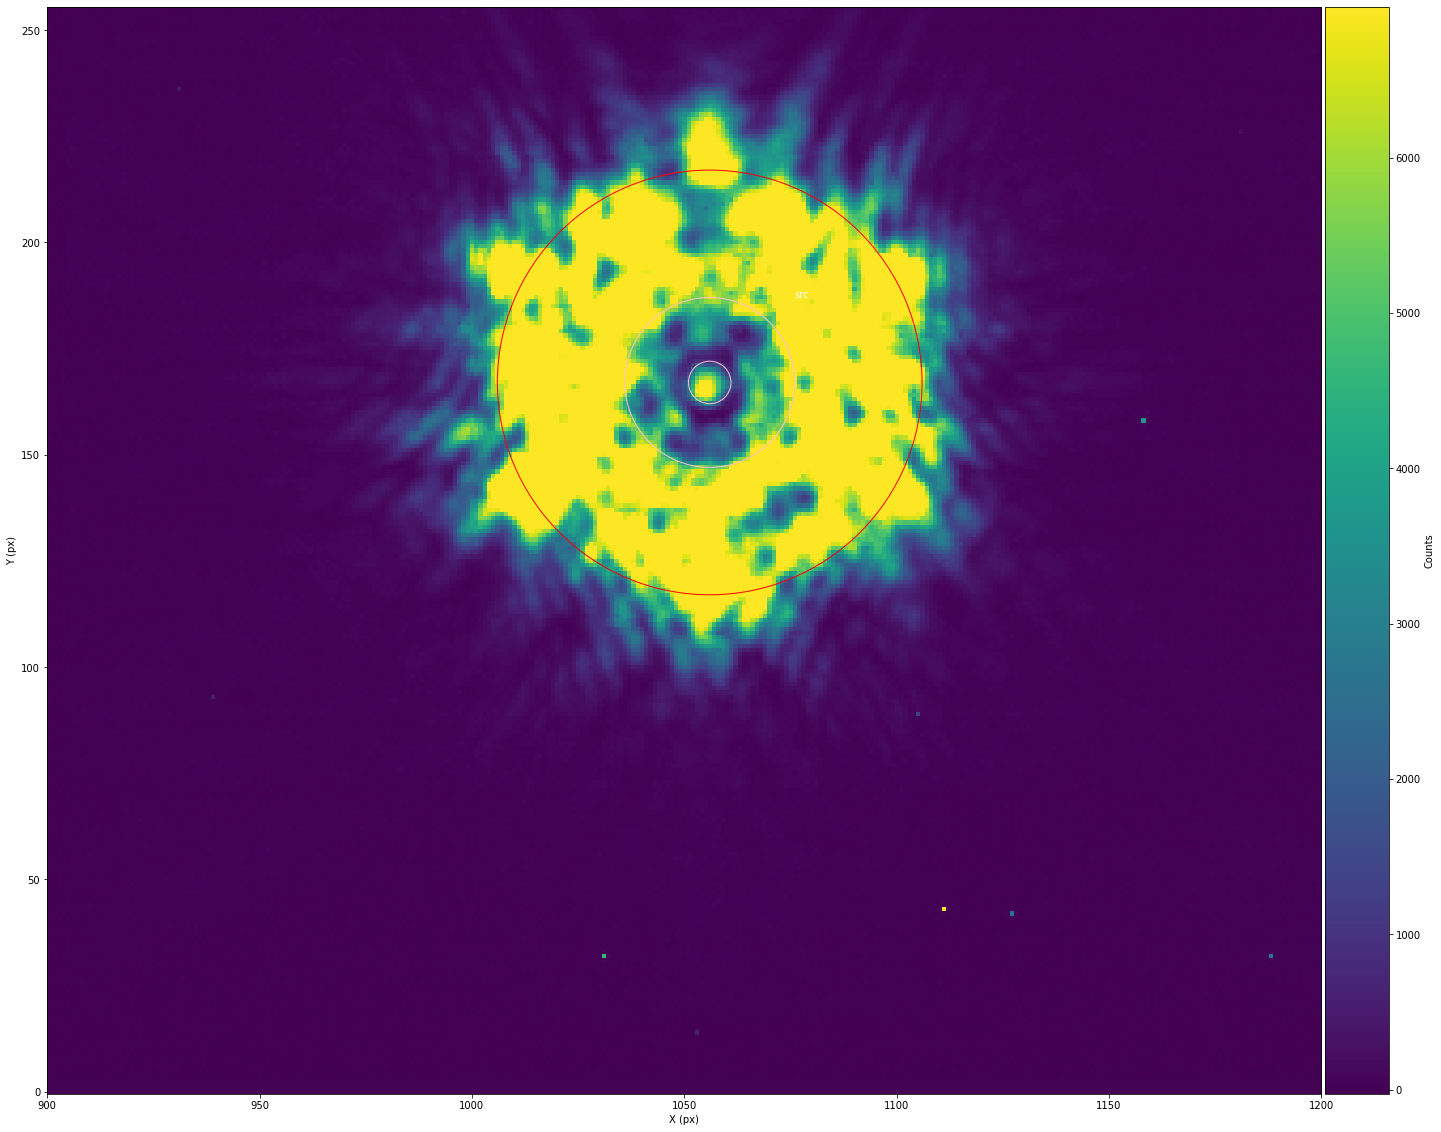

In [28]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' 
alteredParam['backEnd'] = 20 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 5 #Changing the inner radius
alteredParam['bkgMethod'] = 'mean' #Due to the odd aperture configuration, we need to do mean background subtraction

alteredParam['doCentering'] =False #old way/by eye
alteredParam['srcNameShort'] = 'WASP80b_phot5' #provide a new name for centroid realignment

#Assignimg a object new phot3
phot5 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object

phot5.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [29]:
phot5.get_allimg_cen(recenter=False,useMultiprocessing=True) #recenter the centroids each time. 
phot5.do_phot(useMultiprocessing=True) #extract the photometric data

2021-11-23 13:22:01,761 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/io/fits/card.py:998: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

100%|██████████████████████████████████████| 1227/1227 [00:05<00:00, 243.01it/s]


Tshirt Calculated Net Aperture Sum MAD (ppm): 574.5727056947292
Tshirt Calculated Net Aperture Sum std (ppm): 1064.9314785469915
Median Relative Errors Net Aperture Sum (ppm): 458.19425589658795


<ErrorbarContainer object of 3 artists>

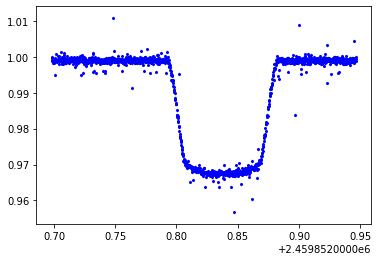

In [30]:
#Tshirt: net aperture
Flux5, Flux_error5 = phot5.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt5 = Flux5['Flux 0']/Flux5['Flux 0'][0] #normalized net aperture sum
std_tshirt5 = np.std(normalized_flux_tshirt5[0:20]) #calculated standard deviation
relative_error_tshirt5 = (Flux_error5['Error 0']/Flux5['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt5[0:300] - np.median(normalized_flux_tshirt5[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt5*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt5)*10**6))

plt.errorbar(Flux5['Time (JD)'],normalized_flux_tshirt5,yerr=relative_error_tshirt5,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')

#### $\textbf{External method: tshirt New Method -  doCentering: True
}$

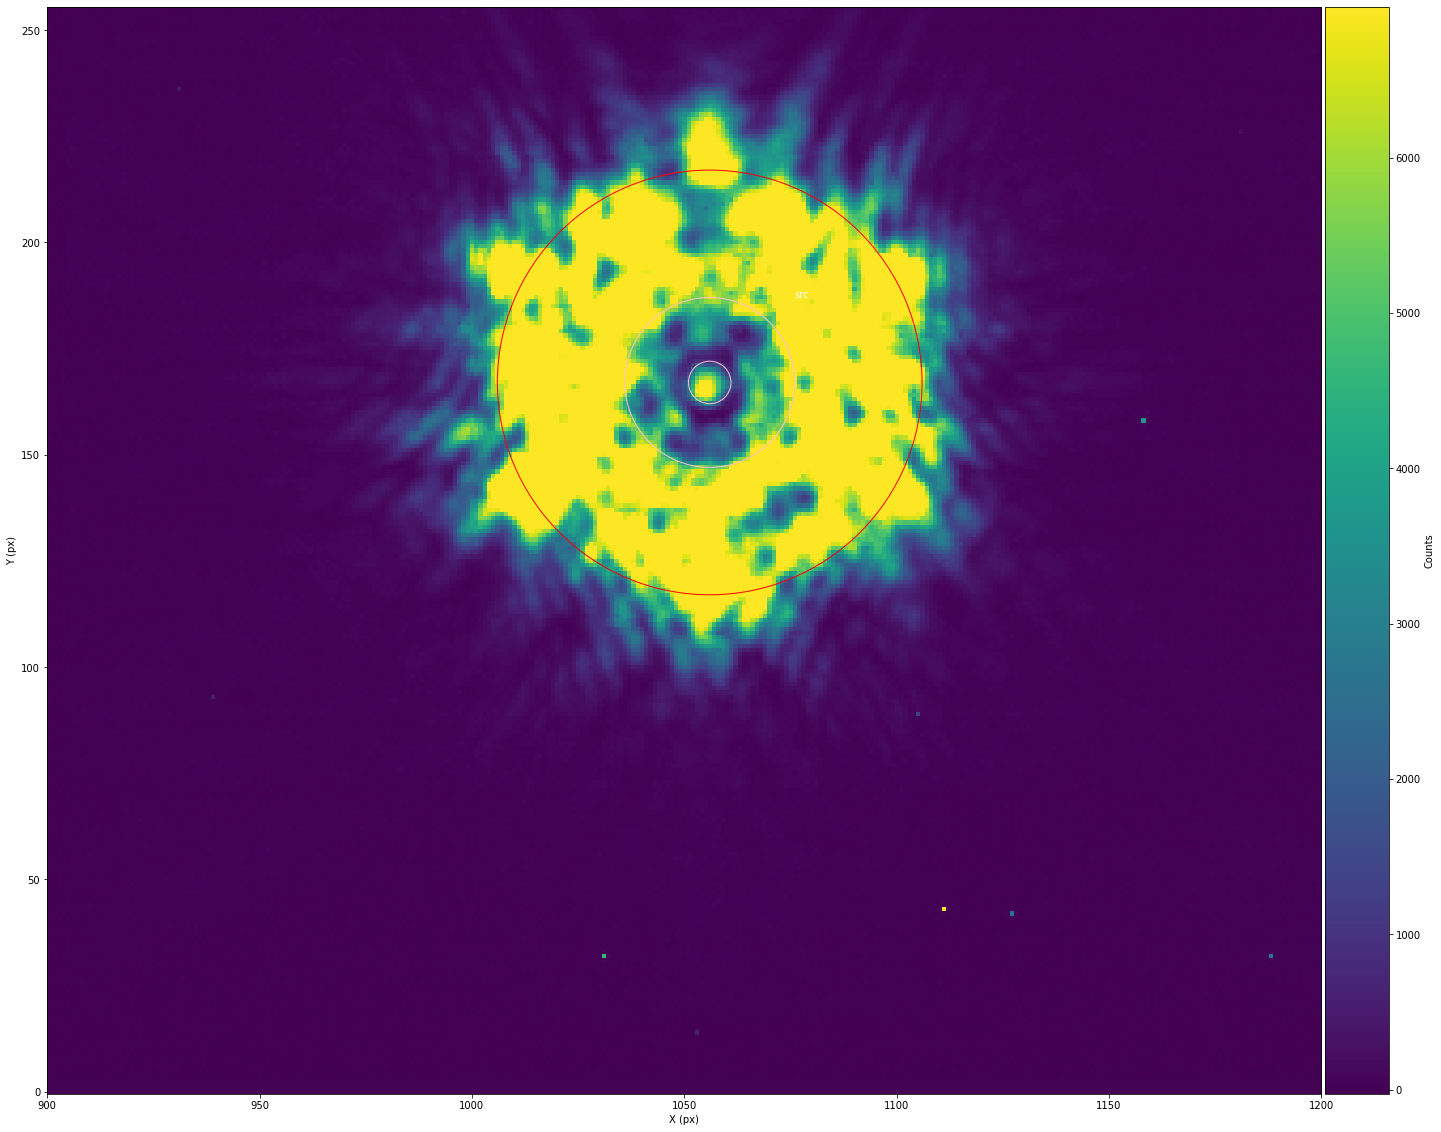

In [31]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' #Changing the outer radius
alteredParam['backEnd'] = 20 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 5 #Changing the inner radius
alteredParam['bkgMethod'] = 'mean' #Due to the odd aperture configuration, we need to do mean background subtraction

alteredParam['doCentering'] =True #new way
alteredParam['srcNameShort'] = 'WASP80b_phot6' #provide a new name for centroid realignment


#Assignimg a object new phot2
phot6 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object
#Assignimg a object phot
phot6.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [32]:
phot6.get_allimg_cen(recenter=False,useMultiprocessing=True) #recenter the centroids each time. 
phot6.do_phot(useMultiprocessing=True) #extract the photometric data

100%|██████████████████████████████████████| 1227/1227 [00:04<00:00, 246.51it/s]
2021-11-23 13:23:06,480 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/io/fits/card.py:998: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',



Tshirt Calculated Net Aperture Sum MAD (ppm): 552.3224864837163
Tshirt Calculated Net Aperture Sum std (ppm): 1061.777751060656
Median Relative Errors Net Aperture Sum (ppm): 454.4729239487841


<ErrorbarContainer object of 3 artists>

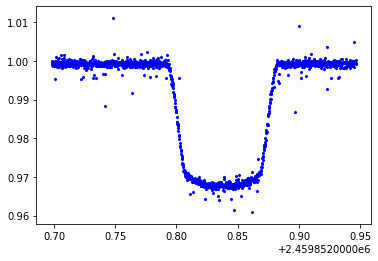

In [33]:
#Tshirt: net aperture
Flux6, Flux_error6 = phot6.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt6 = Flux6['Flux 0']/Flux6['Flux 0'][0] #normalized net aperture sum
std_tshirt6 = np.std(normalized_flux_tshirt6[0:20]) #calculated standard deviation
relative_error_tshirt6 = (Flux_error6['Error 0']/Flux6['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt6[0:300] - np.median(normalized_flux_tshirt6[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt6*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt6)*10**6))

plt.errorbar(Flux6['Time (JD)'],normalized_flux_tshirt6,yerr=relative_error_tshirt6,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')

#### $\textbf{External method: tshirt Alternative Method -  doCentering: False, use median centroid
}$

In [34]:
print(np.mean(phot6.cenArr[:,0,0]),np.mean(phot6.cenArr[:,0,1]))

1055.098620130055 165.91577566727435


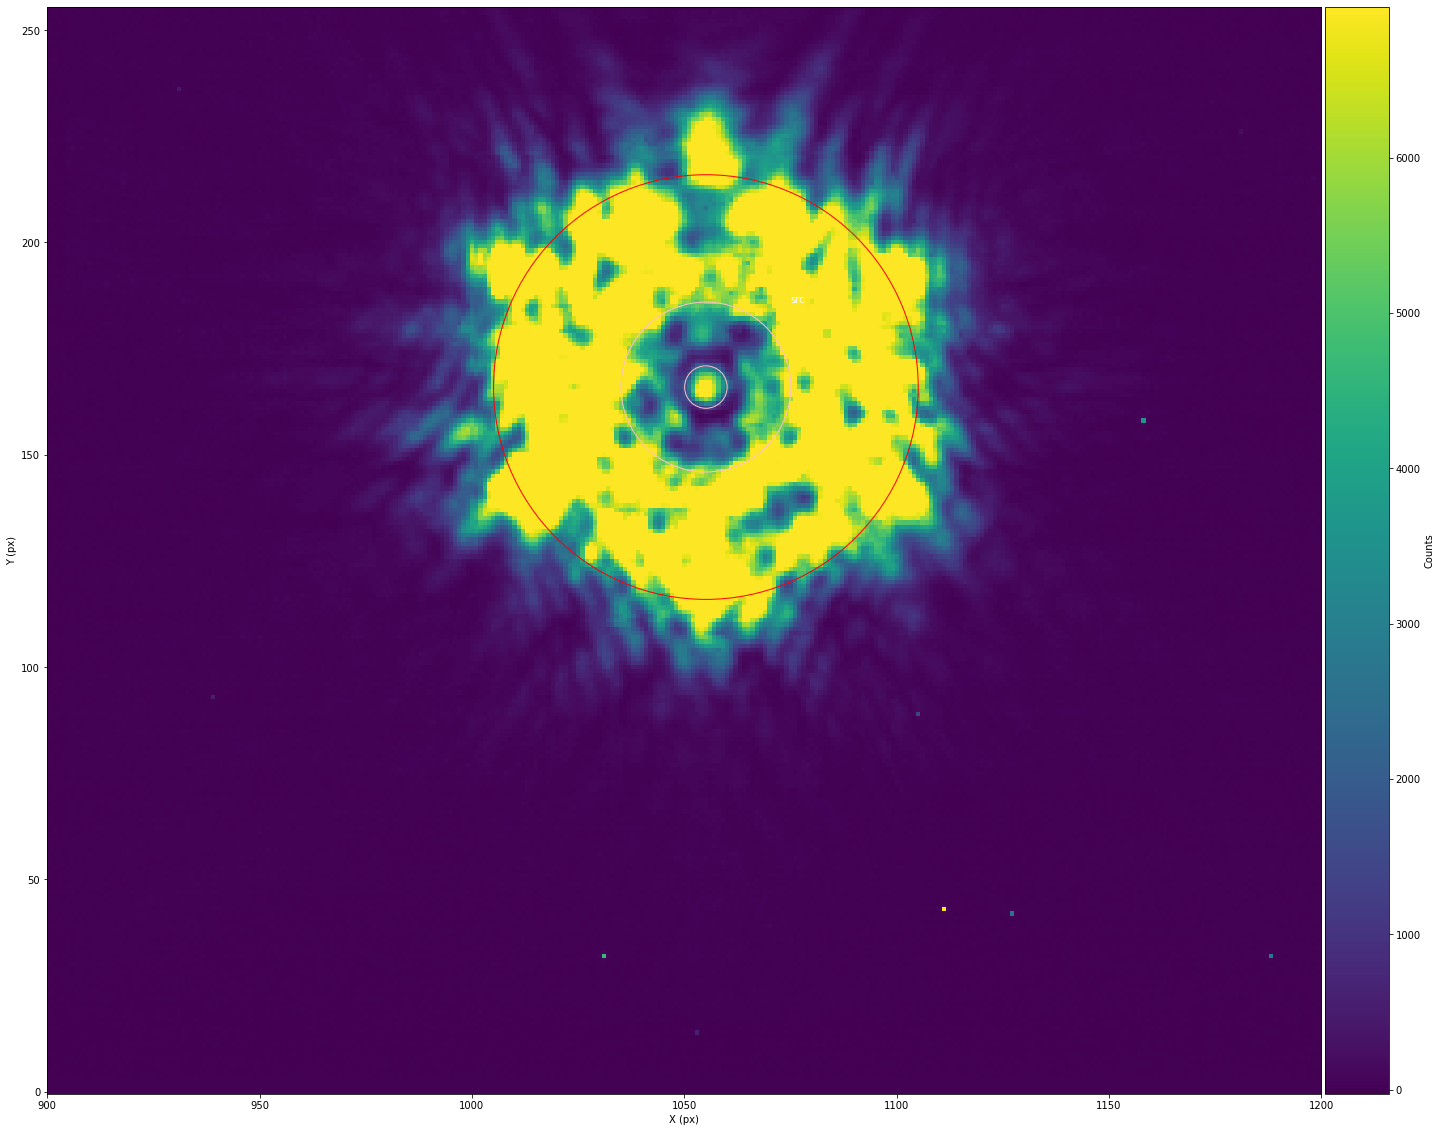

In [35]:
phot = phot_pipeline.phot(paramFile="/fenrirdata1/kg_data/pipeline_output/WASP80b_WLP8/WASP80b_WLP8_NRCA3_phot_pipeline.yaml") #create a photometric object
alteredParam = deepcopy(phot.param)
alteredParam['srcGeometry']='Circular'
alteredParam['bkgGeometry'] = 'CircularAnnulus' 
alteredParam['backEnd'] = 20 #Changing the outer radius
alteredParam['apRadius'] = 50 #Changing the source radius
alteredParam['backStart'] = 5 #Changing the inner radius
alteredParam['bkgMethod'] = 'mean' #Due to the odd aperture configuration, we need to do mean background subtraction

alteredParam['doCentering'] =False #alt way
alteredParam['refStarPos'] = [[1055.098620130055,165.91577566727435]]
alteredParam['srcNameShort'] = 'WASP80b_phot7' #provide a new name for centroid realignment

#Assignimg a object new phot3
phot7 = phot_pipeline.phot(directParam=alteredParam) #create new photometric object

phot7.showStarChoices(showAps=True,showPlot=True,apColor='red',backColor='pink', figSize=(30,20),xLim=[900,1200]) #Plot the source and background subtraction area

In [36]:
phot7.get_allimg_cen(recenter=True,useMultiprocessing=True) #recenter the centroids each time. 
phot7.do_phot(useMultiprocessing=True) #extract the photometric data

2021-11-23 13:24:03,915 - stpipe - WARNING - /home/kglidic/.local/lib/python3.9/site-packages/astropy/io/fits/card.py:998: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

100%|██████████████████████████████████████| 1227/1227 [00:04<00:00, 251.56it/s]


Tshirt Calculated Net Aperture Sum MAD (ppm): 566.4289447597781
Tshirt Calculated Net Aperture Sum std (ppm): 1054.1607144210702
Median Relative Errors Net Aperture Sum (ppm): 454.4713219111857


<ErrorbarContainer object of 3 artists>

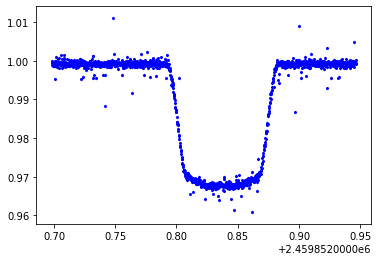

In [37]:
#Tshirt: net aperture
Flux7, Flux_error7 = phot7.get_tSeries() #The flux data and flux data errors
normalized_flux_tshirt7 = Flux7['Flux 0']/Flux7['Flux 0'][0] #normalized net aperture sum
std_tshirt7 = np.std(normalized_flux_tshirt7[0:20]) #calculated standard deviation
relative_error_tshirt7 = (Flux_error7['Error 0']/Flux7['Flux 0'])

#MAD: 
deviation = normalized_flux_tshirt7[0:300] - np.median(normalized_flux_tshirt7[0:300])
mad = np.median(np.abs(deviation))*1.48

print(style.BOLD+"Tshirt Calculated Net Aperture Sum MAD (ppm):"+style.END + " " +str(mad*10**6))
print(style.BOLD+"Tshirt Calculated Net Aperture Sum std (ppm):"+style.END + " " +str(std_tshirt7*10**6))
print(style.BOLD+"Median Relative Errors Net Aperture Sum (ppm):"+style.END + " " +str(np.median(relative_error_tshirt7)*10**6))

plt.errorbar(Flux7['Time (JD)'],normalized_flux_tshirt7,yerr=relative_error_tshirt7,fmt='b.',markersize=4,elinewidth=1,ecolor='silver')